<a href="https://colab.research.google.com/github/matheuslbrito/Estudos-Quants/blob/main/Exerc%C3%ADcioMentoria2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercício**



O objetivo deste exercício é praticar atividades de obtenção, manipulação e análise de dados que seriam desempenhadas por um gestor de portfólio.

O foco é a biblioteca Pandas, mas você pode utilizar outra bibliotecas sempre que julgar necessário.

No exercício, você precisa desempenhar as seguintes tarefas:

1. Carregar no Python com a biblioteca pandas os arquivos .csv e .txt que foram passados. O arquivo .csv contém cotações de papéis brasileiros, e o arquivo .txt contém cotações de ações americanas.
2. Utilizando a biblioteca yfinance, ou alguma outra fonte de sua escolha, obtenha os dados da cotação do dólar (apenas o Close) desde o dia inicial do dataframe das ações americanas (.txt).
3. Converta a cotação das ações americanas de dólar para real, utilizando os dados de cotação do dólar que você obteve anteriormente e crie um novo dataframe com o resultado desta operação.
4. Utilizando a função merge da Pandas, realize uma união entre os dataframes de ações brasileiras e o outro de ações americanas com as cotações convertidas para real.
5. Agora você vai simular o desempenho de uma carteira teórica. Para isto, considere a data de início dos aportes como sendo 05-03-2018. Considere que houve apenas um aporte. A carteira que você deve simular é a seguinte: 100 ações de PETR4, 100 ações de VALE3, 100 ações de LREN3, 200 ações de WEGE3, 10 ações de AAPL, 15 ações de META, 30 ações de Coca-Cola(KO) e 20 ações de Morgan Stanley (MS). Qual seria o saldo aproximado desta carteira, em R$ no dia 06/04/23?
6. Utilizando a yfinance, obtenha dados do IBOV e S&P 500. Junte isso aos dados do dólar anteriormente. Para o IBOV, utilize o ticker '^BVSP' e para o S&P500 utilize '^GSPC'. Modifique o nome dessas colunas para que no dataframe fiquem como 'IBOV' e 'S&P500'.
7. **Crie um plot que compara o desempenho da carteira acima com o IBOV, S&P 500 e o dólar.**
8. Qual era o saldo da carteira no dia 02/03/2020?



**Dicas importantes**

a. Na hora de carregar os arquivos .csv e .txt, fique atento à suas características, como separador, marcador decimal, formato do índice, dentre outros

b. Possivelmente, os dados da cotação do dólar vão ter um número de linhas superior ao dataframe de ações americanas, mesmo que sejam referentes à mesma data de início e de fim. Você pode utilizar o método reindex para equalizar os índices e garantir que tenham o mesmo número de linhas

c. Para realizar a multiplicação entre o dataframe de ações americanas e cotação do dólar, você pode usar o método "mul", com uma estrutura parecida com esta:

*americanas.mul(dolar, axis=0)*

# Resolução

## TASK 1 - Importação de dados

### Importação de bibliotecas:

In [1]:
import numpy as np
import pandas as pd
import os
import plotly.graph_objects as go

!pip install -q yfinance
import yfinance as yf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Definição do diretório com os dados no google drive**

In [2]:
novo_local = os.chdir("/content/drive/MyDrive/_EXITO/ExercicioMentoria2")

In [3]:
caminho = os.getcwd()
caminho

'/content/drive/MyDrive/_EXITO/Desafio Gestão Fundos'

In [4]:
arquivos = os.listdir(caminho)
arquivos

['acoes_americanas.txt', 'acoes_brasileiras.csv', 'ExercícioMentoria2.ipynb']

### Criação dos DataFrames com ações americanas e brasileiras:

In [5]:
equities = pd.read_csv("acoes_americanas.txt", sep = ";")
equities.set_index(['Date'], drop = True, inplace = True)
equities.head(5)

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,5.922567,19.046688,NaN,37.577785,25.791210
2008-01-03,5.925303,19.246229,NaN,37.570412,25.901058
2008-01-04,5.472996,19.283632,NaN,36.360840,25.176090
2008-01-07,5.399737,19.738840,NaN,35.630688,25.344519
2008-01-08,5.205502,19.819902,NaN,34.221977,24.495070


In [6]:
acoes = pd.read_csv("acoes_brasileiras.csv", sep = ";", decimal=',')
acoes.set_index(['Date'], drop = True, inplace = True)
acoes.head(5)

# Dúvida inicial: Faz sentido esse preço de LREN3?

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,
2005-01-03,5167.226562,3.752022,8.902522,0.825184
2005-01-04,5167.226562,3.707412,8.539765,0.825184
2005-01-05,5167.226562,3.693071,8.480296,0.825184
2005-01-06,5167.226562,3.704225,8.444613,0.825184
2005-01-07,5167.226562,3.720555,8.670596,0.825184


**Conhecendo um pouco melhor dos dados:**

In [7]:
equities.describe()

,AAPL,KO,META,MS,MSFT
count,3843.000000,3843.000000,2739.000000,3843.000000,3843.000000
mean,45.182744,34.249513,148.593118,36.918227,87.805868
std,48.585946,13.021926,86.131248,23.168089,89.022771
min,2.377052,12.142509,17.730000,7.001352,11.376364
25%,11.921888,23.789288,78.449997,21.242930,22.512109
50%,25.078003,32.807693,144.850006,28.998711,41.771603
75%,51.260590,42.589426,191.514999,43.315348,127.520821
max,180.683868,64.306442,382.179993,104.919655,339.075562


In [8]:
acoes.describe()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA
count,4541.000000,4541.000000,4541.000000,4541.000000
mean,218.200204,9.865522,28.840402,8.891268
std,1301.405980,4.845685,20.734838,11.335573
min,0.892573,1.850761,5.583508,0.809005
25%,4.847134,6.899048,15.915184,2.040649
50%,10.345457,8.792815,21.834671,3.887066
75%,26.687101,12.070403,33.117466,8.600175
max,10334.453125,33.003029,95.894073,44.467350


**Validação da série de LREN3 para saber se os dados recebidos são críveis:**

In [9]:
LREN3 = yf.download('LREN3.SA', start = '2005-01-03', end = '2023-04-06')

[*********************100%***********************]  1 of 1 completed


In [10]:
LREN3

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03,7214.773438,7214.773438,7214.773438,7214.773438,5167.228516,0
2005-01-04,7214.773438,7214.773438,7214.773438,7214.773438,5167.228516,0
2005-01-05,7214.773438,7214.773438,7214.773438,7214.773438,5167.228516,0
2005-01-06,7214.773438,7214.773438,7214.773438,7214.773438,5167.228516,0
2005-01-07,7214.773438,7214.773438,7214.773438,7214.773438,5167.228516,0
...,...,...,...,...,...,...
2023-03-30,17.650000,18.100000,17.370001,17.639999,17.639999,24422300
2023-03-31,17.500000,17.730000,16.379999,16.570000,16.570000,50297100
2023-04-03,16.629999,16.629999,15.180000,15.410000,15.410000,51077800


**Observação:**

LREN3 sofreu os significativos splits após o começo do DataFrame:

Jun 30, 2005	1:253 Stock Split

Oct 04, 2006	5:1 Stock Split

## TASK 2 - Importação da cotação do dólar

**1ª Forma de Extração do yf:**

In [11]:
dolar = yf.download('BRL=X', start = '2008-01-02', end = '2023-04-07')

[*********************100%***********************]  1 of 1 completed


In [12]:
dolar.head(7)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,1.7760,1.7822,1.7560,1.7645,1.7645,0
2008-01-03,1.7645,1.7684,1.7480,1.7480,1.7480,0
2008-01-04,1.7480,1.7665,1.7391,1.7572,1.7572,0
2008-01-07,1.7615,1.7777,1.7451,1.7640,1.7640,0
2008-01-08,1.7640,1.7669,1.7460,1.7520,1.7520,0
2008-01-09,1.7520,1.7724,1.7520,1.7687,1.7687,0
2008-01-10,1.7687,1.7687,1.7577,1.7602,1.7602,0


In [13]:
dolar = dolar.drop(['Open', 'High', 'Low', 'Adj Close', 'Volume'], axis = 1)

dolar.rename(columns={'Close': 'Dolar'}, inplace=True)

In [14]:
dolar

,Dolar
Date,
2008-01-02,1.7645
2008-01-03,1.7480
2008-01-04,1.7572
2008-01-07,1.7640
2008-01-08,1.7520
...,...
2023-03-31,5.0927
2023-04-03,5.0623
2023-04-04,5.0631


**2ª Forma de Extração do yf:**

In [15]:
dolar2 = yf.download('BRL=X', start = '2008-01-02', end = '2023-04-07')['Close']

[*********************100%***********************]  1 of 1 completed


**Gráficos comparando as 2 formas de extração:**

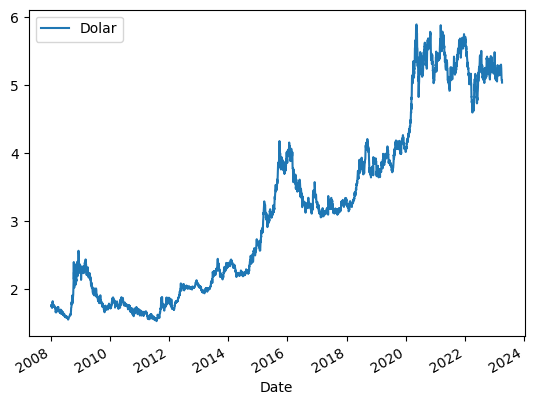

In [16]:
dolar.plot();

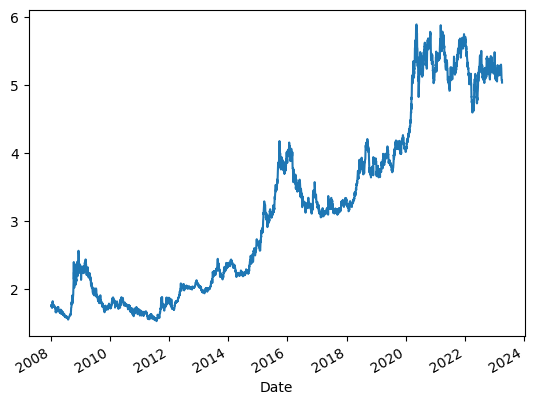

In [17]:
dolar2.plot();

## TASK 3 - Reordenação de index e conversão de moeda

### Reordenação de Index



Tamanho do dolar.index é maior que o arquivo de ações americanas, por exemplo, podem ter dias que a bolsa americana não abriu e houve negociação de moedas.

In [18]:
equities.index

Index(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07', '2008-01-08',
       '2008-01-09', '2008-01-10', '2008-01-11', '2008-01-14', '2008-01-15',
       ...
       '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
       '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06'],
      dtype='object', name='Date', length=3843)

In [19]:
dolar.index

DatetimeIndex(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07',
               '2008-01-08', '2008-01-09', '2008-01-10', '2008-01-11',
               '2008-01-14', '2008-01-15',
               ...
               '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29',
               '2023-03-30', '2023-03-31', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06'],
              dtype='datetime64[ns]', name='Date', length=3952, freq=None)

In [20]:
dolar = dolar.reindex(equities.index)

In [21]:
dolar.index

Index(['2008-01-02', '2008-01-03', '2008-01-04', '2008-01-07', '2008-01-08',
       '2008-01-09', '2008-01-10', '2008-01-11', '2008-01-14', '2008-01-15',
       ...
       '2023-03-24', '2023-03-27', '2023-03-28', '2023-03-29', '2023-03-30',
       '2023-03-31', '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06'],
      dtype='object', name='Date', length=3843)

### Criação do dataframe de ações americanas em BRL

In [22]:
equities_brl = pd.DataFrame()

equities_brl = equities.mul(dolar['Dolar'], axis=0)

equities_brl.head()

,AAPL,KO,META,MS,MSFT
Date,,,,,
2008-01-02,10.450370,33.607882,NaN,66.306003,45.508591
2008-01-03,10.357431,33.642409,NaN,65.673081,45.275050
2008-01-04,9.617148,33.885199,NaN,63.893268,44.239426
2008-01-07,9.525137,34.819315,NaN,62.852535,44.707732
2008-01-08,9.120039,34.724469,NaN,59.956903,42.915361


In [23]:
equities_brl.tail()

,AAPL,KO,META,MS,MSFT
Date,,,,,
2023-03-31,839.786200,315.900175,1079.346851,447.139076,1468.225349
2023-04-03,841.202416,315.887541,1078.624342,441.230104,1454.044544
2023-04-04,838.601255,314.975438,1087.148808,429.452129,1454.020981
2023-04-05,830.377832,318.439967,1072.351650,425.026087,1441.802867
2023-04-06,828.766695,316.286275,1087.674505,423.745102,1467.681089


## TASK 4 - União de DataFrames

Unir o DataFrame de ações brasileiras com o DataFrame de ações americanas com valor convertido para BRL.

In [24]:
portfolio = pd.merge(acoes, equities_brl, how = 'inner', on = 'Date')

portfolio.head()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT
Date,,,,,,,,,
2008-01-02,4.164557,15.457663,27.546089,2.696683,10.450370,33.607882,NaN,66.306003,45.508591
2008-01-03,4.110534,15.208918,27.688812,2.692368,10.357431,33.642409,NaN,65.673081,45.275050
2008-01-04,4.051811,14.462685,26.689732,2.685896,9.617148,33.885199,NaN,63.893268,44.239426
2008-01-07,3.814576,14.038044,26.213974,2.696683,9.525137,34.819315,NaN,62.852535,44.707732
2008-01-08,3.664247,14.809144,26.737303,2.621176,9.120039,34.724469,NaN,59.956903,42.915361


In [25]:
portfolio.tail()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT
Date,,,,,,,,,
2023-03-31,16.57,23.450001,80.290001,40.549999,839.786200,315.900175,1079.346851,447.139076,1468.225349
2023-04-03,15.41,24.490000,80.309998,39.590000,841.202416,315.887541,1078.624342,441.230104,1454.044544
2023-04-04,15.39,24.270000,78.040001,39.630001,838.601255,314.975438,1087.148808,429.452129,1454.020981
2023-04-05,14.97,24.350000,76.889999,38.750000,830.377832,318.439967,1072.351650,425.026087,1441.802867
2023-04-06,15.71,24.000000,76.750000,38.610001,828.766695,316.286275,1087.674505,423.745102,1467.681089


## TASK 5 - Cálculo de saldo do primeiro aporte

Data Inicial = 05/03/2018

Quantidade Aportes = 1

Carteira:
* PETR4 = 100
* VALE3 = 100
* LREN3 = 100
* WEGE3 = 200
* AAPL = 10
* KO = 30
* META = 15
* MS = 20
* MSFT = 0

Saldo em 06/04/2023?

**Ideia Inicial** era criar um DataFrame com as quantidades compradas para cada papel e realizar uma multiplicação:

In [26]:
# Definição de um dataframe com o aporte informado:

df_aporte = pd.DataFrame({'Quantidade' : [100, 100, 100, 200, 10, 30, 15, 20, 0],
                          'Tickers' : ['PETR4.SA', 'VALE3.SA', 'LREN3.SA', 'WEGE3.SA', 'AAPL', 'KO', 'META', 'MS', 'MSFT']})

df_aporte.set_index('Tickers', drop = True, inplace = True)

df_aporte.transpose()

Tickers,PETR4.SA,VALE3.SA,LREN3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT
Quantidade,100,100,100,200,10,30,15,20,0


**Ideia Secundaria:** Como não consegui desenvolver a ideia inicial, optei por uma solução mais direta para encontrar o valor da carteira

In [27]:
portfolio['carteira'] = portfolio['PETR4.SA'] * 100 + portfolio['VALE3.SA'] * 100 + portfolio['LREN3.SA'] * 100 + portfolio['WEGE3.SA'] * 100 + portfolio['AAPL'] * 10 + portfolio['KO'] * 30 + portfolio['META'] * 15 + portfolio['MS'] * 20 + portfolio['MSFT'] * 0

In [28]:
portfolio.tail()

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT,carteira
Date,,,,,,,,,,
2023-03-31,16.57,23.450001,80.290001,40.549999,839.786200,315.900175,1079.346851,447.139076,1468.225349,59093.851600
2023-04-03,15.41,24.490000,80.309998,39.590000,841.202416,315.887541,1078.624342,441.230104,1454.044544,58872.617323
2023-04-04,15.39,24.270000,78.040001,39.630001,838.601255,314.975438,1087.148808,429.452129,1454.020981,58464.550657
2023-04-05,14.97,24.350000,76.889999,38.750000,830.377832,318.439967,1072.351650,425.026087,1441.802867,57938.773805
2023-04-06,15.71,24.000000,76.750000,38.610001,828.766695,316.286275,1087.674505,423.745102,1467.681089,58073.274899


In [29]:
precos_aporte = pd.DataFrame(portfolio.loc['2018-03-05']).transpose()

precos_aporte

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT,carteira
2018-03-05,28.429731,9.747345,29.805807,8.130662,136.943222,120.727601,586.227808,156.448755,287.183592,24525.007009


In [30]:
precos_final = pd.DataFrame(portfolio.iloc[-1]).transpose()

precos_final

,LREN3.SA,PETR4.SA,VALE3.SA,WEGE3.SA,AAPL,KO,META,MS,MSFT,carteira
2023-04-06,15.71,24.0,76.75,38.610001,828.766695,316.286275,1087.674505,423.745102,1467.681089,58073.274899


In [31]:
valor_inicial = precos_aporte.iloc[0, precos_aporte.columns.get_loc('carteira')]
valor_final = precos_final.iloc[0, precos_final.columns.get_loc('carteira')]

saldo = valor_final - valor_inicial

saldo

33548.267890037736

## TASK 6 - Obtenção de dados do IBOV e S&P500

Ibovespa: '^BVSP'

S&P500: '^GSPC'

### Importação

**Importação dos valores do ibovespa**

In [32]:
BVSP = yf.download('^BVSP', start = '2008-01-02', end = '2023-04-07')

BVSP.drop(['Open','High','Low','Adj Close','Volume'], axis = 1, inplace = True)

BVSP.rename(columns={'Close': 'IBOV'}, inplace=True)

BVSP = BVSP.reindex(equities.index)

BVSP.head()

[*********************100%***********************]  1 of 1 completed


,IBOV
Date,
2008-01-02,62815.0
2008-01-03,62892.0
2008-01-04,61037.0
2008-01-07,60772.0
2008-01-08,62081.0


In [33]:
BVSP.tail()

,IBOV
Date,
2023-03-31,101882.0
2023-04-03,101506.0
2023-04-04,101869.0
2023-04-05,100978.0
2023-04-06,100822.0


**Importação dos valores do S&P500**

In [34]:
SP500 = yf.download('^GSPC', start = '2008-01-02', end = '2023-04-07')

SP500.drop(['Open','High','Low','Adj Close','Volume'], axis = 1, inplace = True)

SP500.rename(columns={'Close': 'S&P500'}, inplace=True)

SP500 = SP500.reindex(equities.index)

SP500.head()

[*********************100%***********************]  1 of 1 completed


,S&P500
Date,
2008-01-02,1447.160034
2008-01-03,1447.160034
2008-01-04,1411.630005
2008-01-07,1416.180054
2008-01-08,1390.189941


In [35]:
SP500.tail()

,S&P500
Date,
2023-03-31,4109.310059
2023-04-03,4124.509766
2023-04-04,4100.600098
2023-04-05,4090.379883
2023-04-06,4105.020020


### Concatenação

In [36]:
benchmarks = pd.DataFrame()

benchmarks = pd.concat([dolar, BVSP, SP500], axis = 1)

benchmarks[['Dolar', 'IBOV', 'S&P500']].bfill(inplace = True)

benchmarks

,Dolar,IBOV,S&P500
Date,,,
2008-01-02,1.7645,62815.0,1447.160034
2008-01-03,1.7480,62892.0,1447.160034
2008-01-04,1.7572,61037.0,1411.630005
2008-01-07,1.7640,60772.0,1416.180054
2008-01-08,1.7520,62081.0,1390.189941
...,...,...,...
2023-03-31,5.0927,101882.0,4109.310059
2023-04-03,5.0623,101506.0,4124.509766
2023-04-04,5.0631,101869.0,4100.600098


### EDA do DF Benchmarks

Existem valores nulos no Dataframe como por exemplo quando 25/01 é dia útil e a bolsa de São Paulo não funcionou devido ao feriado municipal. 

**Ponto de Atenção:** A minha utilização do .bfill() não zerou os valores em questão, entender o porquê.

In [37]:
benchmarks.isna().sum()

Dolar      28
IBOV      158
S&P500      0
dtype: int64

In [38]:
benchmarks_nulls = benchmarks[benchmarks.isna().any(axis=1)]

In [39]:
benchmarks_nulls

,Dolar,IBOV,S&P500
Date,,,
2008-01-25,1.7803,NaN,1330.609985
2008-02-04,1.7425,NaN,1380.819946
2008-02-05,1.7575,NaN,1336.640015
2008-04-01,NaN,62775.0,1370.180054
2008-04-21,1.6660,NaN,1388.170044
...,...,...,...
2022-10-12,5.2921,NaN,3577.030029
2022-11-02,5.1424,NaN,3759.689941
2022-11-15,5.3312,NaN,3991.729980


## TASK 7 - Plotar desempenho da carteira vs. Ibov, S&P500, Dólar

### Manipulação dos dados para plotar

Criação de um DataFrame específico para ser plotado, considerando como data inicial o aporte no Portfolio informado!

In [45]:
carteira = pd.DataFrame()

carteira = pd.DataFrame(portfolio.loc['2018-03-05':]['carteira'])

carteira['normalizada'] = carteira['carteira'] / carteira['carteira'].iloc[0]

carteira

,carteira,normalizada
Date,,
2018-03-05,24525.007009,1.000000
2018-03-06,24453.579149,0.997088
2018-03-07,24449.115821,0.996906
2018-03-08,24542.856088,1.000728
2018-03-09,25147.543837,1.025384
...,...,...
2023-03-31,59093.851600,2.409535
2023-04-03,58872.617323,2.400514
2023-04-04,58464.550657,2.383875


Normalização de todos os benchmarks para que sejam factíveis de serem comparados de um mesmo gráfico junto a carteira normalizada!

In [47]:
benchmarks['dolar_normalizado'] = benchmarks['Dolar'] / benchmarks['Dolar'].iloc[0]
benchmarks['IBOV_normalizado'] = benchmarks['IBOV'] / benchmarks['IBOV'].iloc[0]
benchmarks['S&P500_normalizado'] = benchmarks['S&P500'] / benchmarks['S&P500'].iloc[0]
benchmarks

,Dolar,IBOV,S&P500,dolar_normalizado,IBOV_normalizado,S&P500_normalizado
Date,,,,,,
2008-01-02,1.7645,62815.0,1447.160034,1.000000,1.000000,1.000000
2008-01-03,1.7480,62892.0,1447.160034,0.990649,1.001226,1.000000
2008-01-04,1.7572,61037.0,1411.630005,0.995863,0.971695,0.975448
2008-01-07,1.7640,60772.0,1416.180054,0.999717,0.967476,0.978593
2008-01-08,1.7520,62081.0,1390.189941,0.992916,0.988315,0.960633
...,...,...,...,...,...,...
2023-03-31,5.0927,101882.0,4109.310059,2.886200,1.621937,2.839569
2023-04-03,5.0623,101506.0,4124.509766,2.868971,1.615952,2.850072
2023-04-04,5.0631,101869.0,4100.600098,2.869425,1.621730,2.833550


### Criação do gráfico de comparação

In [49]:
fig = go.Figure()

fig.add_trace(go.Scatter(name = 'Portfolio', x = carteira.index, y = carteira['normalizada']))
fig.add_trace(go.Scatter(name = 'Dolar', x = carteira.index, y = benchmarks['dolar_normalizado']))
fig.add_trace(go.Scatter(name = 'IBOV', x = carteira.index, y = benchmarks['IBOV_normalizado']))
fig.add_trace(go.Scatter(name = 'S&P500', x = carteira.index, y = benchmarks['S&P500_normalizado']))

fig.update_layout(title_text = 'Portfolio vs. Benchmarks', template = 'simple_white')

fig.show()

## TASK 8 - Saldo em 02/03/2020

In [ ]:
valor_inicial = precos_aporte.iloc[-1, carteira.columns.get_loc('carteira')]
valor_final = precos_final.iloc[-1, carteira.columns.get_loc('carteira')]

saldo = valor_final - valor_inicial

saldo

In [50]:
carteira.loc['2020-03-02']

carteira       38636.908193
normalizada        1.575409
Name: 2020-03-02, dtype: float64

In [ ]:
valor_final = precos_final.iloc['2020-03-02', carteira.columns.get_loc('carteira')]